In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [2]:
df = pd.read_csv('C:/Users/tomas.hehir/Python/data/radars.csv')

In [3]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [4]:
df['Player'] = df['Player'].str.split('\\', expand=True)[0]

In [5]:
df['Player']

0      Patrick van Aanholt
1            Tammy Abraham
2                Che Adams
3         Tosin Adarabioyo
4                   Adrián
              ...         
500            Andi Zeqiri
501    Oleksandr Zinchenko
502           Hakim Ziyech
503             Kurt Zouma
504        Martin Ødegaard
Name: Player, Length: 505, dtype: object

In [6]:
df.Player.unique()

array(['Patrick van Aanholt', 'Tammy Abraham', 'Che Adams',
       'Tosin Adarabioyo', 'Adrián', 'Sergio Agüero', 'Ola Aina',
       'Rayan Aït Nouri', 'Semi Ajayi', 'Nathan Aké', 'Marc Albrighton',
       'Thiago Alcántara', 'Toby Alderweireld', 'Rúnar Alex Rúnarsson',
       'Trent Alexander-Arnold', 'Ezgjan Alioski', 'Alisson', 'Allan',
       'Dele Alli', 'Miguel Almirón', 'Marcos Alonso', 'Steven Alzate',
       'Daniel Amartey', 'Ethan Ampadu', 'Joachim Andersen',
       'Elliot Anderson', 'Felipe Anderson', 'Michail Antonio',
       'Alphonse Areola', 'Stuart Armstrong', 'Kepa Arrizabalaga',
       'Pierre-Emerick Aubameyang', 'Serge Aurier', 'Charlie Austin',
       'Jordan Ayew', 'Luke Ayling', 'César Azpilicueta', 'Eric Bailly',
       'Fabián Balbuena', 'George Baldock', 'Gareth Bale',
       'Patrick Bamford', 'Phil Bardsley', 'Ross Barkley',
       'Ashley Barnes', 'Harvey Barnes', 'Kyle Bartley', 'Chris Basham',
       'Michy Batshuayi', 'Jan Bednarek', 'Donny van de Beek

In [7]:
df = df[(df['Player'] == "Alexandre Lacazette") | (df['Player'] == "Pierre-Emerick Aubameyang")]

In [8]:
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
31,32,Pierre-Emerick Aubameyang,ga GAB,FW,Arsenal,31-257,1989,19.6,8,44,...,14.3,0,2,2,8.2,6.7,0.15,-0.2,-0.7,Matches
240,241,Alexandre Lacazette,fr FRA,FW,Arsenal,29-278,1991,15.7,9,29,...,13.0,2,2,2,6.8,5.3,0.18,2.2,1.7,Matches


In [9]:
df = df.reset_index()

In [10]:
df

,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,31,32,Pierre-Emerick Aubameyang,ga GAB,FW,Arsenal,31-257,1989,19.6,8,...,14.3,0,2,2,8.2,6.7,0.15,-0.2,-0.7,Matches
1,240,241,Alexandre Lacazette,fr FRA,FW,Arsenal,29-278,1991,15.7,9,...,13.0,2,2,2,6.8,5.3,0.18,2.2,1.7,Matches


In [11]:
df = df.drop(['index', 'Rk', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'FK', 'Matches'], axis=1)

In [12]:
df

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Pierre-Emerick Aubameyang,8,44,17,38.6,2.25,0.87,0.14,0.35,14.3,2,2,8.2,6.7,0.15,-0.2,-0.7
1,Alexandre Lacazette,9,29,20,69.0,1.84,1.27,0.24,0.35,13.0,2,2,6.8,5.3,0.18,2.2,1.7


In [13]:
df = df.drop(['Dist'], axis=1)

In [14]:
df

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Pierre-Emerick Aubameyang,8,44,17,38.6,2.25,0.87,0.14,0.35,2,2,8.2,6.7,0.15,-0.2,-0.7
1,Alexandre Lacazette,9,29,20,69.0,1.84,1.27,0.24,0.35,2,2,6.8,5.3,0.18,2.2,1.7


In [15]:
#get parameters
params = list(df.columns)
params = params[1:]
params

['Gls',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'PK',
 'PKatt',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'np:G-xG']

In [16]:
#ranges
#add ranges to list of tuple pairs
#create empty lists

ranges = []
a_values = []
b_values = []


for x in params:
    print(x)
    a = min(df[params][x])
    print(a)
    a = a - (a*0.25)

    b = max(df[params][x])
    b = b + (b*0.25)

    ranges.append((a,b))

#values
for x in range(len(df['Player'])):
    if df['Player'][x] == 'Alexandre Lacazette':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Pierre-Emerick Aubameyang':
        b_values = df.iloc[x].values.tolist()

a_values = a_values[1:]
b_values = b_values[1:]
values = [a_values, b_values]

Gls
8
Sh
29
SoT
17
SoT%
38.6
Sh/90
1.84
SoT/90
0.87
G/Sh
0.14
G/SoT
0.35
PK
2
PKatt
2
xG
6.8
npxG
5.3
npxG/Sh
0.15
G-xG
-0.2
np:G-xG
-0.7


In [139]:
values

[[9, 29, 20, 69.0, 1.84, 1.27, 0.24, 0.35, 2, 2, 6.8, 5.3, 0.18, 2.2, 1.7],
 [8, 44, 17, 38.6, 2.25, 0.87, 0.14, 0.35, 2, 2, 8.2, 6.7, 0.15, -0.2, -0.7]]

In [105]:
#title 

title = dict(
    title_name = 'Alexandre Lacazette',
    title_color = 'red',
    title_name_2 = 'Pierre-Emerick Aubameyang',
    title_color_2 = 'blue',
    title_fontsize = 18)
endnote = '\n mossystats'

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

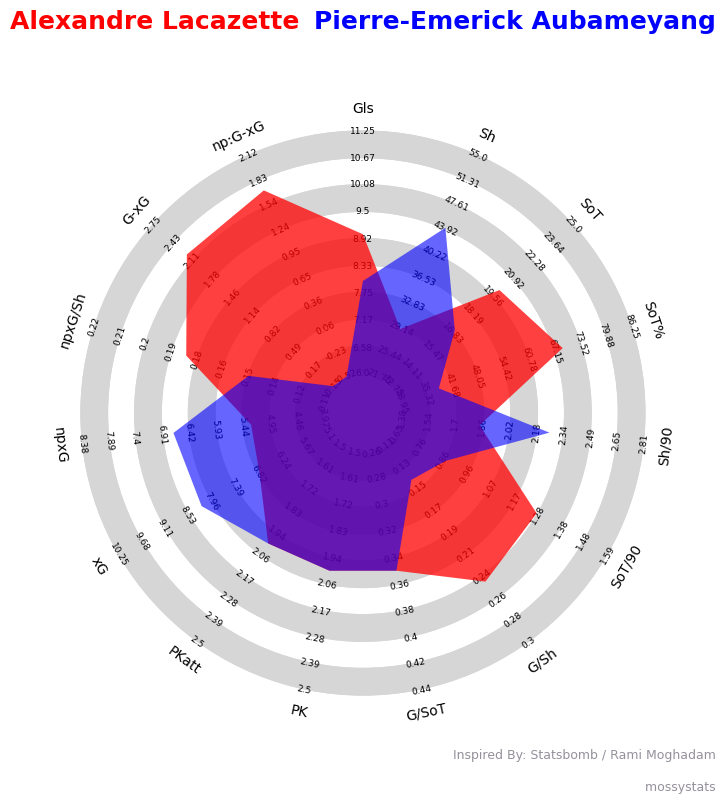

In [106]:
radar = Radar()

fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                          radar_color = ['red','blue'],
                           alphas=[0.75, 0.6], title=title, endnote=endnote, compare=True)